<a href="https://colab.research.google.com/github/Jinukki/KJU/blob/master/15108329%20ch6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr=lr
        
    def update(self, params, grads):
        for key in params.key():
            params[key] -= self.lr*grads[key]

In [0]:
from two_layer_net import TwoLayerNet
network = TwoLayerNet(...)
optimizer=SGD()

for i in range(10000):
    ...
    x_batch, t_batch = get_mini_batch(...)
    grads=network.gradient(x_batch, t_batch)
    params=network.params
    optimizer.update(params, grads)
    ...

TypeError: __init__() missing 2 required positional arguments: 'hidden_size' and 'output_size'

In [0]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr=lr
        self.momentum=momentum
        self.v=None
        
    def update(self, params, grads):
        if self.v is None:
            self.v={}
            for key, val in params.items():
                self.v[key]=np.zeros_like(val)
                
        for key in params.keys():
            self.v[key]=self.momentum*self.v[key]-self.lr*grads[key]
            params[key]+=self.v[key]

In [0]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr=lr
        self.h=None
        
    def update(self, params, grads):
        if self.h is None:
            self.h={}
            for key, val in params.items():
                self.h[key]=np.zeros_like(val)
                
        for key in params.key():
            self.h[key]+=grads[key]*grads[key]
            params[key]-=self.lr*grads[key]/(np.sqrt(self.h[key])+1e-7)

In [0]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))

x=np.random.randn(1000, 100) #1000개의 데이터
node_num=100        # 각 은닉층의 노드(뉴런) 수
hidden_layer_size=5 # 은닉층이 5개
activations={}      # 이곳에 활성화 결과(활성화 값)를 저장

for i in range(hidden_layer_size):
    if i != 0:
        x=activations[i-1]
        
    w=np.random.randn(node_num, node_num)*1
    a=np.dot(x,w)
    z=sigmoid(a)
    activations[i]=z

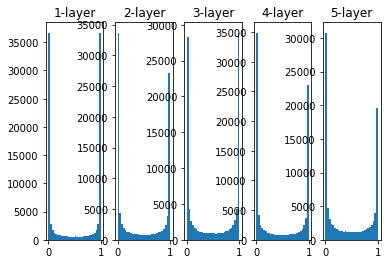

In [0]:
# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1)+"-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

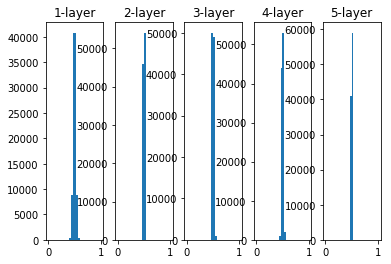

In [0]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))

x=np.random.randn(1000, 100) #1000개의 데이터
node_num=100        # 각 은닉층의 노드(뉴런) 수
hidden_layer_size=5 # 은닉층이 5개
activations={}      # 이곳에 활성화 결과(활성화 값)를 저장

for i in range(hidden_layer_size):
    if i != 0:
        x=activations[i-1]
        
    w=np.random.randn(node_num, node_num)*0.01 # 가중치의 표준편차 변경
    a=np.dot(x,w)
    z=sigmoid(a)
    activations[i]=z
    
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1)+"-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

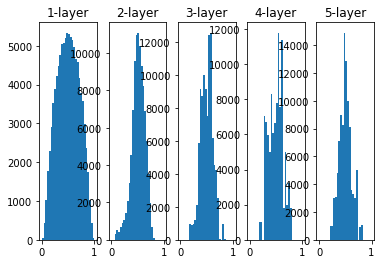

In [0]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))

x=np.random.randn(1000, 100) #1000개의 데이터
node_num=100        # 각 은닉층의 노드(뉴런) 수
hidden_layer_size=5 # 은닉층이 5개
activations={}      # 이곳에 활성화 결과(활성화 값)를 저장

for i in range(hidden_layer_size):
    if i != 0:
        x=activations[i-1]
        
    node_num=100
    w=np.random.randn(node_num, node_num)/np.sqrt(node_num) # Xavier 초깃값
    a=np.dot(x,w)
    z=sigmoid(a)
    activations[i]=z
    
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1)+"-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

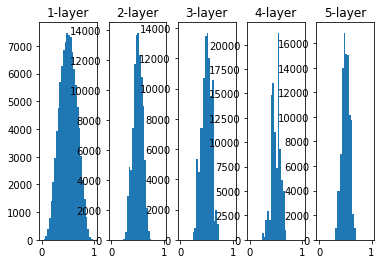

In [0]:
import numpy as np
import matplotlib.pyplot as plt

def Relu(x):
    return np.maximum(0,x)

x=np.random.randn(1000, 100) #1000개의 데이터
node_num=100        # 각 은닉층의 노드(뉴런) 수
hidden_layer_size=5 # 은닉층이 5개
activations={}      # 이곳에 활성화 결과(활성화 값)를 저장

for i in range(hidden_layer_size):
    if i != 0:
        x=activations[i-1]
        
    node_num=100
    w=np.random.randn(node_num, node_num)/np.sqrt(2*node_num) # Xavier 초깃값
    a=np.dot(x,w)
    z=sigmoid(a)
    activations[i]=z
    
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1)+"-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

---
# 6.3 배치 정규화
---
## 앞에서 초깃값을 적당히 설정하면 각 층의 활성화 값 분포가 적당히 퍼지면서 학습이 원할하게 수행 됨을 알 수 있었다.
## 배치 정규화는 이렇게 각 층의 활성화를 퍼뜨리는 작업을 강제로 수행하는 아이디어이다. 
### 배치 정규화의 장점
 1. 학습 속도 개선
 2. 골치 아픈 초깃값 선택장애 감소(초깃값에 크게 의존하지 않음)
 3. 드롭아웃 등의 필요성 감소(오버피팅 억제)
 
## 배치 정규화는 데이터 분포를 정규화하는 배치 정규화 계층을 신경망에 삽입한다. 학습 시 미니배치를 단위로 정규화하고, 데이터 분포의 평균을 0, 분산이 1이 되도록(적절한 분포가 되도록) 정규화 한다.

### 배치 정규화의 효과는 아래 그림과 같다.

![batchnorm](https://user-images.githubusercontent.com/52277776/68000066-f0b77580-fca1-11e9-8d1a-24507a78faee.png)

### 다음은 가중치 초깃값의 표준편차를 바꿔가며 만든 그래프이며 거의 모든 겨웅에서 배치 정규화를 사용할 때(실선)의 학습 진도가 빠른 것으로 나타난다. 

![batchnormgraphs](https://user-images.githubusercontent.com/52277776/68000163-50158580-fca2-11e9-8fea-c1db93dac073.PNG)


---
# 6.4 바른 학습을 위해
---
##  오버피팅
### 신경망이 훈련 데이터에 지나치에 적응되어 그 외 데이터에는 제대로 대응하지 못하는 상태로 매개변수가 많고 표현력이 높은 모델이나 훈련 데이터가 적으면 발생

In [0]:
from dataset.mnist import load_mnist
(x_train, t_train), (x_test, t_test)=load_mnist(normalize=True)
#오버비팅 재현을 위해 학습 데이터 줄임
x_train = x_train[:300] #60,000개 데이터 중 300개만 사용
t_train = t_train[:300]

epoch0, train acc:0.11333333333333333, test acc:0.1055
epoch1, train acc:0.13666666666666666, test acc:0.1208
epoch2, train acc:0.13, test acc:0.1225
epoch3, train acc:0.15333333333333332, test acc:0.1316
epoch4, train acc:0.18333333333333332, test acc:0.1496
epoch5, train acc:0.20333333333333334, test acc:0.1558
epoch6, train acc:0.22, test acc:0.166
epoch7, train acc:0.25, test acc:0.1902
epoch8, train acc:0.30666666666666664, test acc:0.2213
epoch9, train acc:0.31, test acc:0.2364
epoch10, train acc:0.36333333333333334, test acc:0.2885
epoch11, train acc:0.3566666666666667, test acc:0.2873
epoch12, train acc:0.37333333333333335, test acc:0.3144
epoch13, train acc:0.36333333333333334, test acc:0.2971
epoch14, train acc:0.4066666666666667, test acc:0.3333
epoch15, train acc:0.44, test acc:0.3547
epoch16, train acc:0.49333333333333335, test acc:0.3917
epoch17, train acc:0.5, test acc:0.4112
epoch18, train acc:0.5133333333333333, test acc:0.4152
epoch19, train acc:0.52, test acc:0.4246


epoch168, train acc:1.0, test acc:0.7595
epoch169, train acc:1.0, test acc:0.7593
epoch170, train acc:1.0, test acc:0.7602
epoch171, train acc:1.0, test acc:0.759
epoch172, train acc:1.0, test acc:0.7611
epoch173, train acc:1.0, test acc:0.7614
epoch174, train acc:1.0, test acc:0.7598
epoch175, train acc:1.0, test acc:0.7601
epoch176, train acc:1.0, test acc:0.7607
epoch177, train acc:1.0, test acc:0.7616
epoch178, train acc:1.0, test acc:0.7621
epoch179, train acc:1.0, test acc:0.7627
epoch180, train acc:1.0, test acc:0.7614
epoch181, train acc:1.0, test acc:0.7613
epoch182, train acc:1.0, test acc:0.7609
epoch183, train acc:1.0, test acc:0.7622
epoch184, train acc:1.0, test acc:0.7639
epoch185, train acc:1.0, test acc:0.7633
epoch186, train acc:1.0, test acc:0.7637
epoch187, train acc:1.0, test acc:0.7634
epoch188, train acc:1.0, test acc:0.7618
epoch189, train acc:1.0, test acc:0.7628
epoch190, train acc:1.0, test acc:0.763
epoch191, train acc:1.0, test acc:0.7624
epoch192, train ac

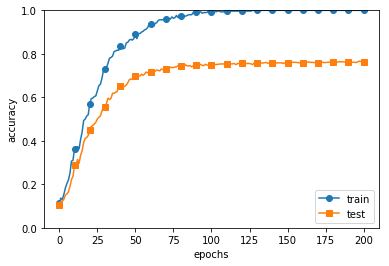

In [0]:
import os
import sys
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from multi_layer_net import MultiLayerNet
from optimizer import SGD
#7층 네트워크 사용
network=MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)
optimizer=SGD(lr=0.01) # 학습률이 0.01인 SGD(확률적 경사 하강법)로 매개변수 갱신
max_epochs=201
train_size=x_train.shape[0]
batch_size=100

train_loss_list=[]
train_acc_list=[] #훈련 데이터와 시험 데이터의 정확도 값의 리스트를 초기 공란 설정
test_acc_list=[]

iter_per_epoch=max(train_size/batch_size, 1)
epoch_cnt=0

for i in range(1000000000):
    batch_mask=np.random.choice(train_size, batch_size) #훈련데이터에서 미니배치 획득
    x_batch=x_train[batch_mask]
    t_batch=t_train[batch_mask]
    
    grads=network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads) #update method는 SGD과정에서 반복해서 불림.
    
    if i % iter_per_epoch==0: # 1 에폭당 정확도 계산
        train_acc=network.accuracy(x_train, t_train)
        test_acc=network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        
        print("epoch"+str(epoch_cnt)+", train acc:"+str(train_acc)+", test acc:"+str(test_acc))
        
        epoch_cnt+=1
        if epoch_cnt >= max_epochs:
            break
            
            
# 그래프 그리기
markers={'train':'o','test':'s'} # train은 o마크, test는 ㅁ마크
x=np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel('accuracy')
plt.ylim(0,1.0)
plt.legend(loc='lower right')
plt.show()

## 가중치 감소
### 학습 과정에서 큰 가중치에 대해서는 그에 상응하는 패널티를 부과하여 오버피팅을 억제하는 방법

epoch0, train acc:0.09666666666666666, test acc:0.1282
epoch1, train acc:0.14333333333333334, test acc:0.1435
epoch2, train acc:0.18, test acc:0.1667
epoch3, train acc:0.2, test acc:0.1849
epoch4, train acc:0.25666666666666665, test acc:0.2101
epoch5, train acc:0.2866666666666667, test acc:0.2311
epoch6, train acc:0.34, test acc:0.2548
epoch7, train acc:0.37333333333333335, test acc:0.2838
epoch8, train acc:0.3933333333333333, test acc:0.2956
epoch9, train acc:0.42333333333333334, test acc:0.3151
epoch10, train acc:0.4166666666666667, test acc:0.3186
epoch11, train acc:0.4666666666666667, test acc:0.358
epoch12, train acc:0.4533333333333333, test acc:0.3646
epoch13, train acc:0.4766666666666667, test acc:0.3754
epoch14, train acc:0.5, test acc:0.3827
epoch15, train acc:0.5, test acc:0.3949
epoch16, train acc:0.55, test acc:0.4231
epoch17, train acc:0.5866666666666667, test acc:0.444
epoch18, train acc:0.55, test acc:0.4414
epoch19, train acc:0.6133333333333333, test acc:0.468
epoch20, 

epoch164, train acc:0.9433333333333334, test acc:0.7494
epoch165, train acc:0.9466666666666667, test acc:0.7583
epoch166, train acc:0.9433333333333334, test acc:0.7539
epoch167, train acc:0.9366666666666666, test acc:0.7472
epoch168, train acc:0.9333333333333333, test acc:0.7541
epoch169, train acc:0.94, test acc:0.7544
epoch170, train acc:0.93, test acc:0.7505
epoch171, train acc:0.9366666666666666, test acc:0.7542
epoch172, train acc:0.9466666666666667, test acc:0.7518
epoch173, train acc:0.9433333333333334, test acc:0.7521
epoch174, train acc:0.9533333333333334, test acc:0.7593
epoch175, train acc:0.9433333333333334, test acc:0.7566
epoch176, train acc:0.9466666666666667, test acc:0.7514
epoch177, train acc:0.94, test acc:0.7508
epoch178, train acc:0.9433333333333334, test acc:0.7496
epoch179, train acc:0.9466666666666667, test acc:0.7505
epoch180, train acc:0.9433333333333334, test acc:0.7518
epoch181, train acc:0.9233333333333333, test acc:0.7476
epoch182, train acc:0.943333333333

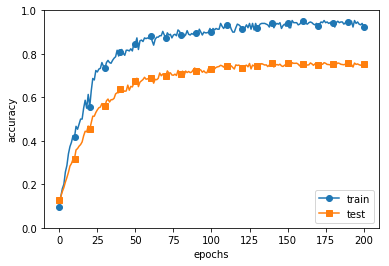

In [0]:
# 위의 실험에서 0.1로 가중
import os
import sys
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from multi_layer_net import MultiLayerNet
from optimizer import SGD

weight_decay_lambda=0.1 # 가중치 감쇠 설정(사용하지 않을 경우 =0)
network=MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10, weight_decay_lambda=weight_decay_lambda)
optimizer=SGD(lr=0.01)
max_epochs=201
train_size=x_train.shape[0]
batch_size=100

train_loss_list=[]
train_acc_list=[]
test_acc_list=[]

iter_per_epoch=max(train_size/batch_size, 1)
epoch_cnt=0

for i in range(1000000000):
    batch_mask=np.random.choice(train_size, batch_size)
    x_batch=x_train[batch_mask]
    t_batch=t_train[batch_mask]
    
    grads=network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)
    
    if i % iter_per_epoch==0:
        train_acc=network.accuracy(x_train, t_train)
        test_acc=network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        
        print("epoch"+str(epoch_cnt)+", train acc:"+str(train_acc)+", test acc:"+str(test_acc))
        
        epoch_cnt+=1
        if epoch_cnt >= max_epochs:
            break
            
            
# 그래프 그리기
markers={'train':'o','test':'s'}
x=np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel('accuracy')
plt.ylim(0,1.0)
plt.legend(loc='lower right')
plt.show()

### 정확도에 여전히 차이가 있지만, 전 그래프와 비교하면 차이가 줄어든 것을 확인할 수 있다.
---
## 드롭아웃
### 뉴런을 임의로 삭제하면서 학습하는 방법<br> 훈련 때는 데이터를 흘릴 때마다 삭제할 뉴런을 무작위로 선택하고, 시험 때는 모든 뉴런에 신호를 전달함.

In [0]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio=dropout_ratio
        self.mask=None
        
    def forward(self, x, train_flg=True):
        if train_flg: #훈련 때는 데이터를 흘릴 때마다 삭제할 뉴런을 무작위 선택
            self.mask=np.random.rand(*x.shape)>self.dropout_ratio
            # self.mask는 x와 형상이 같은 배열을 무작위로 생성, 그 값이 dropout_ratio보다 큰 원소만 True로 설정
            # 즉 순전파 때마다 self.mask에 삭제할 뉴런을 False 표시
            return x * self.mask
        else: #시험 때는 각 뉴런의 출력에 훈련 때 삭제한 비율을 곱하여 출력
            return x * (1.0-self.dropout_ratio)
        
    def backward(self, dout):
        return dout*self.mask # 역전파 때의 동작은 ReLU와 같음

train loss:2.3113192076764513
=== epoch:1, train acc:0.08, test acc:0.1011 ===
train loss:2.3126391610206807
train loss:2.322444776111054
train loss:2.3063958415620487
=== epoch:2, train acc:0.08333333333333333, test acc:0.1017 ===
train loss:2.2968881992206764
train loss:2.2873508368971835
train loss:2.3184341223597618
=== epoch:3, train acc:0.09, test acc:0.1039 ===
train loss:2.3151110655519296
train loss:2.3034672739961874
train loss:2.3058496299536966
=== epoch:4, train acc:0.09, test acc:0.105 ===
train loss:2.316285804497453
train loss:2.2893158240423435
train loss:2.301359791088872
=== epoch:5, train acc:0.09666666666666666, test acc:0.1081 ===
train loss:2.3094086008598533
train loss:2.3081919903136336
train loss:2.301155671987503
=== epoch:6, train acc:0.09666666666666666, test acc:0.1115 ===
train loss:2.2917244899592024
train loss:2.3070000286115673
train loss:2.2993600145039585
=== epoch:7, train acc:0.10333333333333333, test acc:0.1139 ===
train loss:2.29116489888087
trai

=== epoch:56, train acc:0.41333333333333333, test acc:0.327 ===
train loss:2.2305162491417128
train loss:2.246926397422155
train loss:2.2327103143775284
=== epoch:57, train acc:0.42333333333333334, test acc:0.3301 ===
train loss:2.241049657198072
train loss:2.2413722466393065
train loss:2.236000346373261
=== epoch:58, train acc:0.42, test acc:0.3321 ===
train loss:2.241153938032721
train loss:2.243909417468324
train loss:2.2386933777263103
=== epoch:59, train acc:0.42333333333333334, test acc:0.3353 ===
train loss:2.2456633359474143
train loss:2.2304431274926726
train loss:2.2399011574043115
=== epoch:60, train acc:0.4266666666666667, test acc:0.3375 ===
train loss:2.2331313541819098
train loss:2.2240635327212415
train loss:2.2265074136406553
=== epoch:61, train acc:0.4266666666666667, test acc:0.3354 ===
train loss:2.2339953612234233
train loss:2.235411690224536
train loss:2.240663710631836
=== epoch:62, train acc:0.43333333333333335, test acc:0.3373 ===
train loss:2.229413924816389
t

=== epoch:112, train acc:0.5066666666666667, test acc:0.4145 ===
train loss:2.149281394801499
train loss:2.164929340454009
train loss:2.1212604075533226
=== epoch:113, train acc:0.5066666666666667, test acc:0.4166 ===
train loss:2.1525953510475637
train loss:2.148250459173297
train loss:2.1217130624907408
=== epoch:114, train acc:0.5066666666666667, test acc:0.4217 ===
train loss:2.11422701933152
train loss:2.1148045550269106
train loss:2.131483054316586
=== epoch:115, train acc:0.5066666666666667, test acc:0.4237 ===
train loss:2.0950285645628837
train loss:2.125821770441434
train loss:2.135746895036077
=== epoch:116, train acc:0.5166666666666667, test acc:0.4255 ===
train loss:2.1179991037642694
train loss:2.117630658303662
train loss:2.1339088893314346
=== epoch:117, train acc:0.5233333333333333, test acc:0.4255 ===
train loss:2.0783481185612724
train loss:2.109474931309097
train loss:2.110516484728387
=== epoch:118, train acc:0.5166666666666667, test acc:0.4284 ===
train loss:2.159

train loss:1.9328585552744826
=== epoch:167, train acc:0.6066666666666667, test acc:0.4782 ===
train loss:1.8535476035927045
train loss:1.81418823930028
train loss:1.8370079447723062
=== epoch:168, train acc:0.61, test acc:0.4749 ===
train loss:1.8674382320365939
train loss:1.7720169524640184
train loss:1.852542579938616
=== epoch:169, train acc:0.61, test acc:0.477 ===
train loss:1.8993141546942292
train loss:1.8118854351214486
train loss:1.758284225736508
=== epoch:170, train acc:0.61, test acc:0.479 ===
train loss:1.772650600590224
train loss:1.836228251569423
train loss:1.8186043501332123
=== epoch:171, train acc:0.61, test acc:0.4791 ===
train loss:1.7935273529432383
train loss:1.8116671393392128
train loss:1.8098267310059244
=== epoch:172, train acc:0.6133333333333333, test acc:0.4788 ===
train loss:1.8382747282836471
train loss:1.8771657540140148
train loss:1.8070922413834358
=== epoch:173, train acc:0.6133333333333333, test acc:0.479 ===
train loss:1.7750815619268254
train loss

=== epoch:222, train acc:0.6266666666666667, test acc:0.5479 ===
train loss:1.2184839047242901
train loss:1.2360041122666703
train loss:1.3798294176385726
=== epoch:223, train acc:0.63, test acc:0.5494 ===
train loss:1.4360454521670194
train loss:1.3399379436319803
train loss:1.2735141980195979
=== epoch:224, train acc:0.6233333333333333, test acc:0.541 ===
train loss:1.3213939214933204
train loss:1.4793466515762421
train loss:1.2701095272480274
=== epoch:225, train acc:0.62, test acc:0.535 ===
train loss:1.3716510230246188
train loss:1.3321609857158876
train loss:1.3635624261851367
=== epoch:226, train acc:0.6333333333333333, test acc:0.5463 ===
train loss:1.4057594259782393
train loss:1.3399162329833347
train loss:1.247520301637106
=== epoch:227, train acc:0.6233333333333333, test acc:0.5401 ===
train loss:1.4088117741770707
train loss:1.2261933378728813
train loss:1.2739632031873709
=== epoch:228, train acc:0.64, test acc:0.5486 ===
train loss:1.2413600563431348
train loss:1.3522338

=== epoch:278, train acc:0.7466666666666667, test acc:0.6213 ===
train loss:0.9781516198725428
train loss:1.087948360433025
train loss:0.9447475220636926
=== epoch:279, train acc:0.74, test acc:0.6229 ===
train loss:1.0830853337212942
train loss:1.0969398569571582
train loss:0.8911883956237452
=== epoch:280, train acc:0.74, test acc:0.6243 ===
train loss:0.8642621603702351
train loss:0.8727786140807088
train loss:0.9563054107118815
=== epoch:281, train acc:0.7466666666666667, test acc:0.626 ===
train loss:0.9164069120543822
train loss:1.0596186960317906
train loss:1.0163223374239778
=== epoch:282, train acc:0.7433333333333333, test acc:0.6267 ===
train loss:1.0172954339269582
train loss:0.930411628787275
train loss:0.9848853151123272
=== epoch:283, train acc:0.7466666666666667, test acc:0.6276 ===
train loss:0.9128135768835844
train loss:0.8912917522329544
train loss:0.9561098837673933
=== epoch:284, train acc:0.75, test acc:0.6276 ===
train loss:1.0262576798426402
train loss:0.8326379

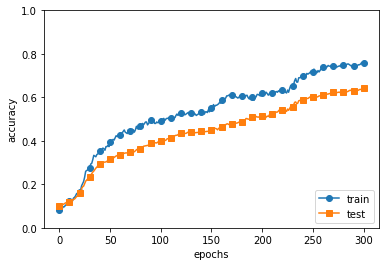

In [0]:
# 드롭아웃으로 mnist 실험 - 7층 네트워크 적용
import os
import sys
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from trainer import Trainer

(x_train, t_train), (x_test, t_test)=load_mnist(normalize=True)
x_train=x_train[:300]
t_train=t_train[:300]
# 드롭아웃 이용 유무와 비율 설정
use_dropout=True # 드롭아웃 쓰지 않을 때는 False
dropout_ratio=0.2

network=MultiLayerNetExtend(input_size=784, hidden_size_list=[100,100,100,100,100,100], output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer=Trainer(network, x_train, t_train, x_test, t_test, epochs=301, mini_batch_size=100, optimizer='sgd', optimizer_param={'lr':0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list=trainer.train_acc_list, trainer.test_acc_list

# 그래프 그리기
markers={'train':'o','test':'s'}
x=np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel('accuracy')
plt.ylim(0,1.0)
plt.legend(loc='lower right')
plt.show()

---
## 적절한 하이퍼파라미터 값 찾기
### 하이퍼파라미터에는 각 층의 뉴런 수, 배치 크기, 매개변수 갱신 시의 학습률과 가중치 감소 등이 있다. 이들을 조정하기 위해서는 전용 확인 데이터가 필요하다. 이를 검증 데이터라고 한다. 정리하면 다음과 왔다. 즉,
 * 훈련 데이터 : 매개변수 학습
 * 검증 데이터 : 하이퍼파라미터 성능 평가
 * 시험 데이터 : 신경망의 범용 성능 평가

In [0]:
# 훈련 데이터 중 20%를 검증 데이터로 분리
from dataset.mnist import load_mnist
from util import shuffle_dataset
(x_train, t_train), (x_test, t_test)=load_mnist()
x_train, t_train = shuffle_dataset(x_train, t_train) # 훈련데이터 뒤섞기
validation_rate=0.20
validation_num=int(x_train.shape[0]*validation_rate)

x_val=x_train[:validation_num] # 20%를 검증데이터로 분리
t_val=t_train[:validation_num]
x_train=x_train[validation_num:] # 나머지 80%를 훈련 데이터로 설정
t_train=t_train[validation_num:]

### 하이퍼 파라미터를 최적화 한다는 것은 최적값이 존재하는 범위를 조금씩 줄여간다는 것이다. 대략적으로 범위를 설정하고 그 범위에서 무작위로 하이퍼파라미터 값을 골라낸 후, 그 값으로 정확도를 평가한다. 최적화 단계는 다음과 같다.

 1. 하이퍼파라미터 값의 범위 설정
 2. 설정된 범위에서 하이퍼파라미터 값을 무작위 추출
 3. 2단계에서 샘플링한 하이퍼파라미터 값을 사용하여 학습하고 검증데이터로 정확도 평가<br>      (에폭은 작게 한다.)
 4. 2단계 및 3단계를 특정 횟수 반복, 그 정확도를 파악한 뒤 하이퍼파라미터의 범위를 좁힌다.


In [0]:
weight_decay=10**np.random.uniform(-8,-4) # 가중치 감소 계수 범위
lr=10**np.random.uniform(-6,-2) # 학습률 범위

### 위와 같은 범위로 실험한 결과는 아래 그림과 간다. 
### (실선과 점선은 각각 검증 데이터, 훈련 데이터에 대한 정확도)

![hyperparameter](https://user-images.githubusercontent.com/52277776/68008645-f96c7380-fcc2-11e9-8195-9416a5312192.PNG)

### 위 그림은 정확도가 높은 순서로 나열된 것이며 이를 바탕으로 학습이 순조롭게 진행된 Best 1-5의 하이퍼파라미터 값을 살펴본 결과는 다음과 같다. 

 * Best-1 (val acc:0.83) : lr:0.0092, wight decay:3.86e-07
 * Best-2 (val acc:0.78) : lr:0.00956, wight decay:6.04e-07
 * Best-3 (val acc:0.77) : lr:0.00571, wight decay:1.27e-06
 * Best-4 (val acc:0.74) : lr:0.00626, wight decay:1.43e-05
 * Best-5 (val acc:0.73) : lr:0.0052, wight decay:8.97e-06

### 위 결과를 통해 학습률이 0.001과 0.01, 가중치 감소 계수가 1e-08과 1e-06인 범위에서 학습이 잘 진행됨을 알 수 있다. 이 작업을 반복해가며 범위를 좁혀가는 것이고 특정 단계에서 최종 하이퍼파라미터 값을 하나 선택한다.